In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from matplotlib.ticker import FuncFormatter

In [2]:
# Load the cleaned data
data = pd.read_csv('data_cleaned.csv')

In [3]:
# Display the first few rows of the dataset

data.head()

,name,price_usd,year,manufacturer,model,class,length_ft,fuel,hull_material,hull_shape
0,1976 ketch baarda zeegrundel1976 ketch baarda ...,26705,1976,ketch,baarda zeegrundel,barge sail boat,2952,diesel,steel,NaN
1,1979 dufour 28001979 dufour 2800,10791,1979,dufour,2800,sailing boats with cabin,272,diesel,fiberglass / polyester,NaN
2,2010 van der graaf classic schooner2010 van de...,13080000,2010,van der graaf,classic schooner,sloop boats,216,diesel,steel,NaN
3,2010 custom van der graaf bv schooner2010 cust...,13080000,2010,custom,van der graaf bv schooner,cleaner,211,diesel,steel,NaN
4,2008 custom build gulet2008 custom build gulet,5450000,2008,custom build,gulet,sailing yachts,141,diesel,wood,NaN


In [4]:
# Display information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1917 non-null   object
 1   price_usd      1917 non-null   int64 
 2   year           1917 non-null   int64 
 3   manufacturer   1917 non-null   object
 4   model          1909 non-null   object
 5   class          1917 non-null   object
 6   length_ft      1917 non-null   int64 
 7   fuel           1797 non-null   object
 8   hull_material  1917 non-null   object
 9   hull_shape     421 non-null    object
dtypes: int64(3), object(7)
memory usage: 149.9+ KB


In [5]:
# Transpose the dataset for better readability

data.T.head()

,0,1,2,3,4,5,6,7,8,9,...,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916
name,1976 ketch baarda zeegrundel1976 ketch baarda ...,1979 dufour 28001979 dufour 2800,2010 van der graaf classic schooner2010 van de...,2010 custom van der graaf bv schooner2010 cust...,2008 custom build gulet2008 custom build gulet,2025 sunreef 1402025 sunreef 140,2015 bodrum custom2015 bodrum custom,1986 fjellstrand dsc passenger catamaran1986 f...,1911 william fife & sons 38meter1911 william f...,2007 schooner eldorado2007 schooner eldorado,...,1965 flying junior1965 flying junior,2021 unbekannt 12-fuß-dinghy2021 unbekannt 12-...,2010 teja wooden boats 12-fuß dingi -verkauft-...,1850 topper 3401850 topper 340,2022 minicat 310 sport2022 minicat 310 sport,2022 minicat guppy2022 minicat guppy,2022 williams jet tenders ersatzschlauch2022 w...,2014 bic open bic2014 bic open bic,1986 sailboat zuanelli 25 1986 sailboat zuanel...,1850 botenkar incl. 17 stallingsbokken1850 bot...
price_usd,26705,10791,13080000,13080000,5450000,0,8665500,1075830,3815000,1417000,...,1035,13625,10791,27,4926,3488,3924,3377,7630,2725
year,1976,1979,2010,2010,2008,2025,2015,1986,1911,2007,...,1965,2021,2010,1850,2022,2022,2022,2014,1986,1850
manufacturer,ketch,dufour,van der graaf,custom,custom build,sunreef,bodrum,fjellstrand,william fife,schooner,...,flying,unbekannt,teja wooden boats,topper,minicat,minicat,williams jet tenders,bic,sailboat zuanelli 25,botenkar
model,baarda zeegrundel,2800,classic schooner,van der graaf bv schooner,gulet,140,custom,dsc passenger catamaran,& sons 38meter,eldorado,...,junior,12-fuß-dinghy,12-fuß dingi -verkauft-,340,310 sport,guppy,ersatzschlauch,open bic,NaN,incl. 17 stallingsbokken


In [6]:
# Explore unique values in 'hull_shape', 'class', 'hull_material', and 'fuel'

unique_hull_shape = data['hull_shape'].unique()
class_values = data['class'].unique()
hull_material_values = data['hull_material'].unique()
fuel_values = data['fuel'].unique()

In [7]:
# Display unique values

print("Unique hull shapes:")
print(unique_hull_shape, '\n')
print("Unique classes:")
print(class_values, '\n')
print("Unique hull materials:")
print(hull_material_values, '\n')
print("Unique fuel values:")
print(fuel_values)

Unique hull shapes:
[nan 'catamaran' 'other' 'monohull' 'displacement' 'semi-displacement'
 'planing' 'trimaran' 'deep vee' 'tunnel'] 

Unique classes:
['barge sail boat' 'sailing boats with cabin' 'sloop boats' 'cleaner'
 'sailing yachts' 'catamaran' 'other (sailboats)'
 'catamarans and trimarans' 'classic sailboats' 'racer/cruiser sailboats'
 'deck saloon sailboats' 'motor glider (sail)' 'commercial ships (sails)'
 'gulets (sail)' 'ketch sailing boats' 'daysailers' 'cutter'
 'racer sailboats' 'sailboats with a center cockpit'
 'dinghy sailing boats' 'trimming' 'dinghies and dinghy cruisers'
 'unspecified (sailboats)' 'performance sailboats'] 

Unique hull materials:
['steel' 'fiberglass / polyester' 'wood' 'composite' 'ferro-cement'
 'aluminum' 'other materials' 'pvc (plastic)'] 

Unique fuel values:
['diesel' 'other' nan 'electric' 'gasoline']


In [8]:
# Check for missing values

missing_values = data.isnull().sum()
print(missing_values)

name                0
price_usd           0
year                0
manufacturer        0
model               8
class               0
length_ft           0
fuel              120
hull_material       0
hull_shape       1496
dtype: int64


# Price Analysis

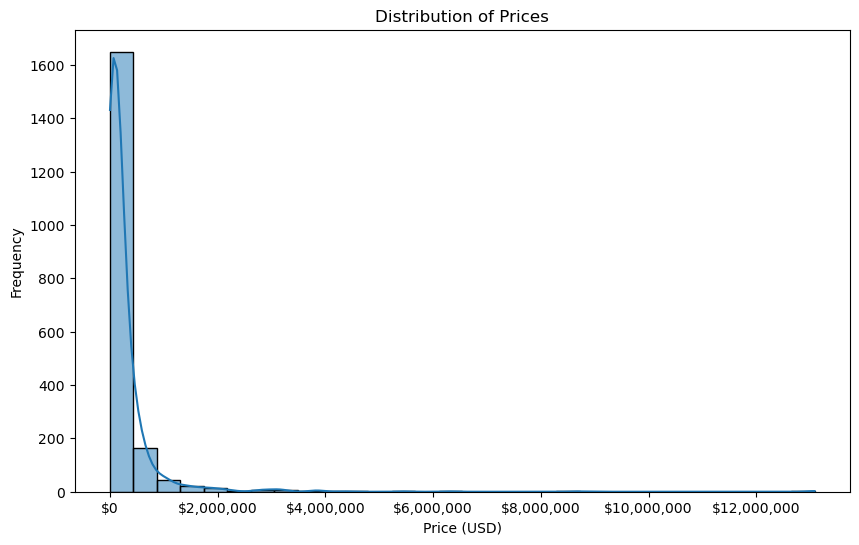

In [9]:
# Distribution of prices

# Define a function to format price labels
def price_formatter(x, pos):
    return "${:,.0f}".format(x)

# Create the histogram plot with formatted price axis
plt.figure(figsize=(10, 6))
sns.histplot(data['price_usd'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

# Apply the formatter to the price axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.show()

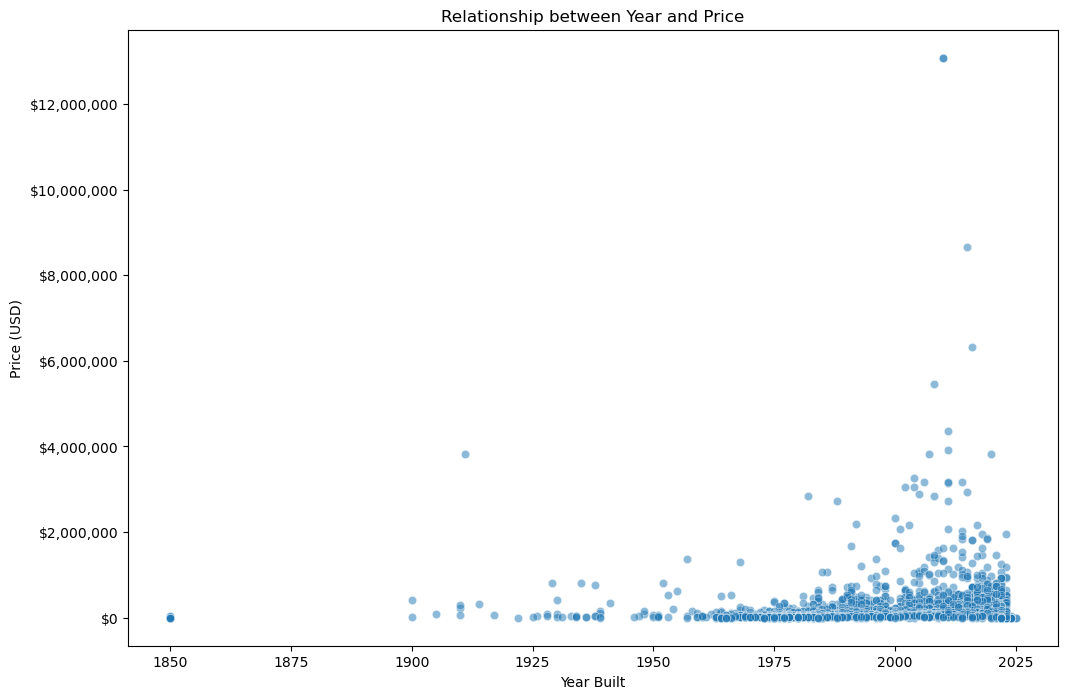

In [10]:
# Relationship between year and price

plt.figure(figsize=(12, 8))
sns.scatterplot(x='year', y='price_usd', data=data, alpha=0.5)  # Add transparency
plt.title('Relationship between Year and Price')
plt.xlabel('Year Built')
plt.ylabel('Price (USD)')

# Format the y-axis ticks and labels
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

Outliers:
      year  price_usd
2     2010   13080000
3     2010   13080000
4     2008    5450000
6     2015    8665500
8     1911    3815000
11    2004    3270000
12    2004    3052000
13    2008    2834000
15    1910     217455
16    2011    2725000
17    2011    4360000
18    2011    3150100
22    2005    2888500
25    2000    2338050
32    2011    3924000
33    1982    2834000
37    1910     299750
41    1905      81750
43    2016    6322000
46    2014    3161000
53    2002    3052000
55    2011    3161000
61    1929     817500
79    1988    2725000
83    2007    3815000
88    2015    2943000
90    2006    3161000
124   1914     321550
191   2020    3815000
258   1850      19075
352   1930     425100
385   1910      73575
393   1900     425100
915   1922          0
991   1926      31610
1033  1930      86110
1106  1928      87200
1143  1930      25615
1268  1917      70850
1583  1928      32700
1675  1850       5450
1714  1850      10900
1732  1850       5450
1734  1925      16895


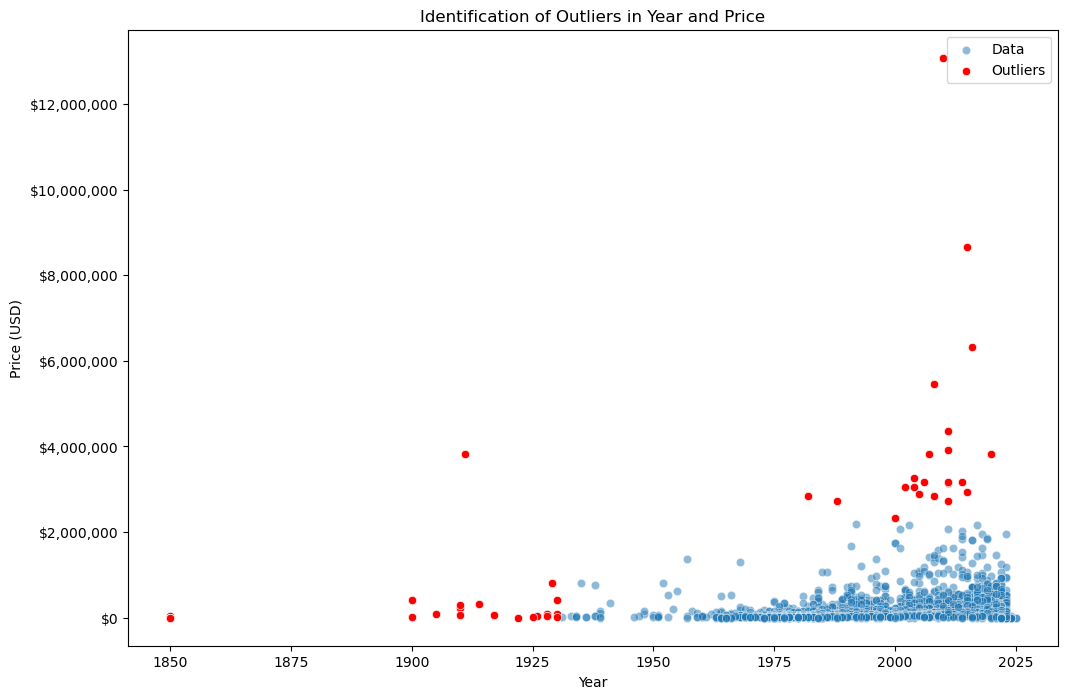

In [11]:
# Calculate Z-scores for 'year' and 'price_usd'
data['year_zscore'] = (data['year'] - data['year'].mean()) / data['year'].std()
data['price_usd_zscore'] = (data['price_usd'] - data['price_usd'].mean()) / data['price_usd'].std()

# Identify outliers based on Z-scores (threshold for outlier detection, e.g., 3)
outliers = data[(np.abs(data['year_zscore']) > 3) | (np.abs(data['price_usd_zscore']) > 3)]

# Display outliers
print("Outliers:")
print(outliers[['year', 'price_usd']])

# Visualize outliers in a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='year', y='price_usd', data=data, alpha=0.5, label='Data')
sns.scatterplot(x='year', y='price_usd', data=outliers, color='red', label='Outliers')
plt.title('Identification of Outliers in Year and Price')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()

# Format the y-axis ticks and labels
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

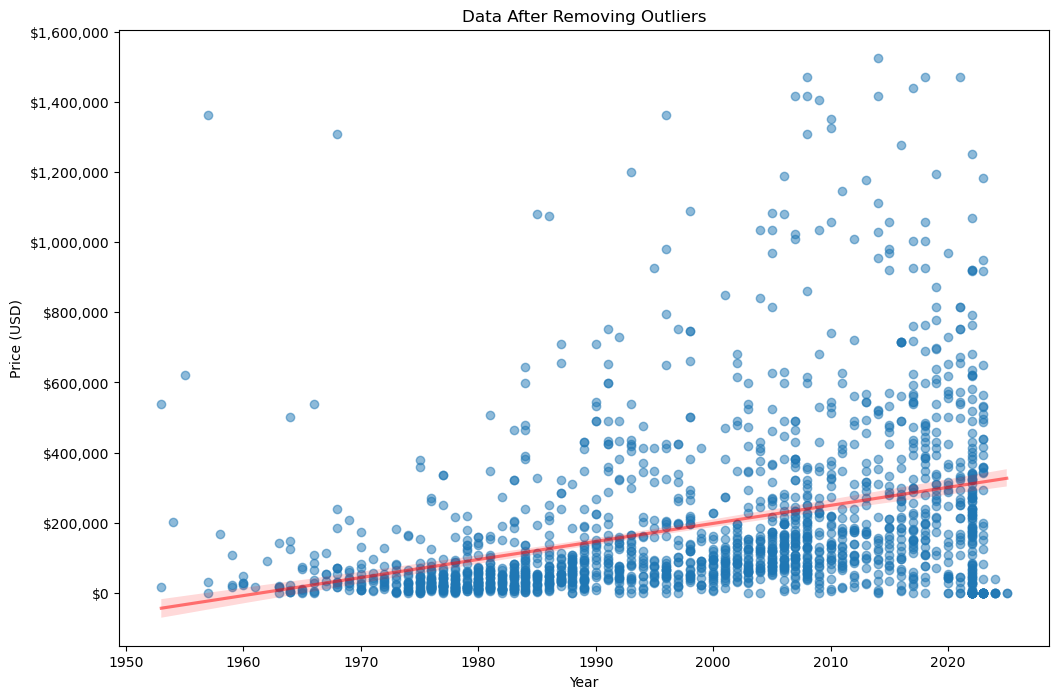

In [12]:
# Define a Z-score threshold for outlier removal
zscore_threshold = 2

# Remove outliers based on Z-scores
filtered_data = data[
    (np.abs(data['year_zscore']) <= zscore_threshold) &
    (np.abs(data['price_usd_zscore']) <= zscore_threshold)
]

# Visualize the filtered data in a scatter plot with a trend line
plt.figure(figsize=(12, 8))
sns.regplot(x='year', y='price_usd', data=filtered_data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'alpha': 0.5}, label='Trend Line')
plt.title('Data After Removing Outliers')
plt.xlabel('Year')
plt.ylabel('Price (USD)')

# Format the y-axis ticks and labels
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

In [13]:
# Filter out rows where the 'year' column is older than 1900
data = data[data['year'] >= 1900]

# Verify the removal
invalid_years_after_removal = (data['year'] < 1900).sum()
print("Number of rows with invalid years after removal:", invalid_years_after_removal)


Number of rows with invalid years after removal: 0


In [14]:
# Display prices over 5 million

expensive = (data['price_usd'] > 5000000).sum()
print("Number of rows with prices over $5mil:", expensive)

Number of rows with prices over $5mil: 5


In [15]:
# Display rows where price_usd is over 5 million

high_price_rows = data[data['price_usd'] > 5000000]
print(high_price_rows.T)

                                                                 2   \
name              2010 van der graaf classic schooner2010 van de...   
price_usd                                                  13080000   
year                                                           2010   
manufacturer                                          van der graaf   
model                                              classic schooner   
class                                                   sloop boats   
length_ft                                                       216   
fuel                                                         diesel   
hull_material                                                 steel   
hull_shape                                                      NaN   
year_zscore                                                0.627873   
price_usd_zscore                                          19.702215   

                                                                 3   \
name 

In [16]:
# Remove rows where price_usd is over 5 million
data = data[data['price_usd'] <= 5000000]

In [17]:
# Display prices over 1 million

expensive = (data['price_usd'] > 1000000).sum()
print("Number of rows with prices over $1mil:", expensive)

Number of rows with prices over $1mil: 83


In [18]:
# Display prices under $1,000

cheap = (data['price_usd'] < 1000).sum()
print("Number of rows with prices under $1,000:", cheap)

Number of rows with prices under $1,000: 73


In [19]:
# Filter out rows where the 'price_usd' column is $0

no_price = (data['price_usd'] == 0).sum()
print("Number of rows with $0 price:", no_price)

Number of rows with $0 price: 67


In [20]:
# Remove rows where the 'price_usd' column is 0
data = data[data['price_usd'] != 0]

# Verify the removal
no_price_after_removal = (data['price_usd'] == 0).sum()
print("Number of rows with $0 price after removal:", no_price_after_removal)

Number of rows with $0 price after removal: 0


In [21]:
# What is the length of boats under $1,000?
cheap_length = data.loc[data['price_usd'] < 1000, 'length_ft']

# Display average, max, and min lengths
average_length = cheap_length.mean()
max_length = cheap_length.max()
min_length = cheap_length.min()

# Display statistics
print("Statistics for boat lengths under $1000:")
print(f"Average Length: {average_length:.2f} ft")
print(f"Maximum Length: {max_length} ft")
print(f"Minimum Length: {min_length} ft")

Statistics for boat lengths under $1000:
Average Length: 21.83 ft
Maximum Length: 27 ft
Minimum Length: 14 ft


In [22]:
cheap_length.describe()

count     6.000000
mean     21.833333
std       4.833908
min      14.000000
25%      19.500000
50%      23.000000
75%      25.000000
max      27.000000
Name: length_ft, dtype: float64

# Manufacturer Analysis

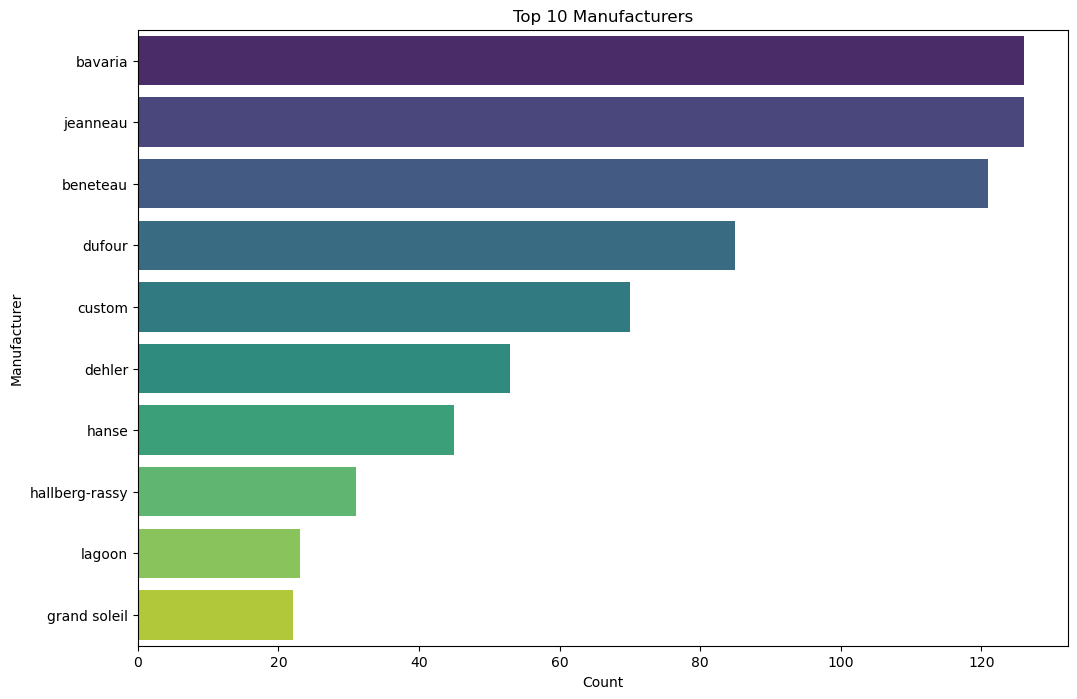

In [23]:
# Top 10 manufacturers

plt.figure(figsize=(12, 8))
top_manufacturers = data['manufacturer'].value_counts().head(10)
sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index, palette='viridis')
plt.title('Top 10 Manufacturers')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.show()

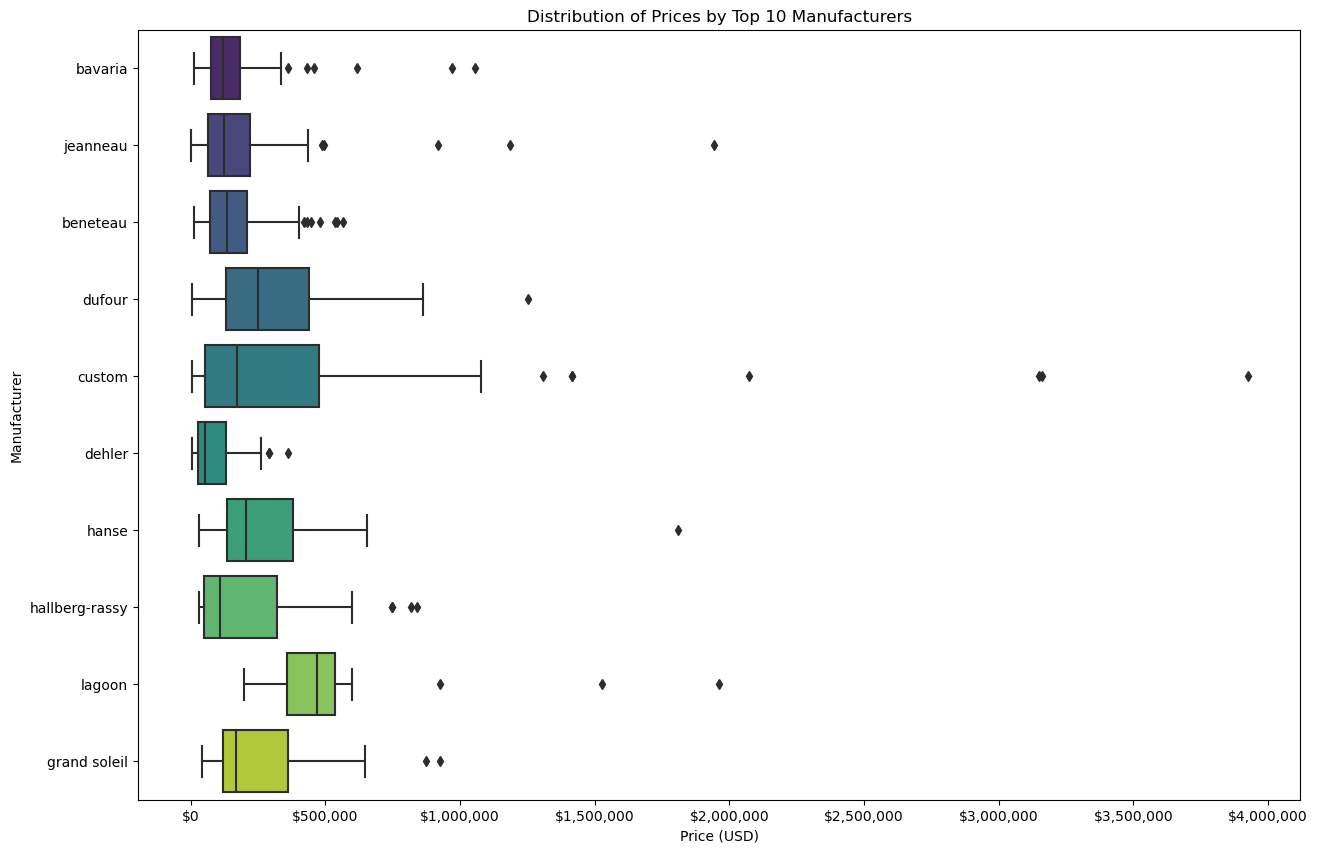

In [24]:
# Manufacturer Distribution by Price

plt.figure(figsize=(15, 10))
sns.boxplot(x='price_usd', y='manufacturer', data=data, order=data['manufacturer'].value_counts().index[:10], palette='viridis')
plt.title('Distribution of Prices by Top 10 Manufacturers')
plt.xlabel('Price (USD)')
plt.ylabel('Manufacturer')

# Format the x-axis ticks and labels
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

plt.show()

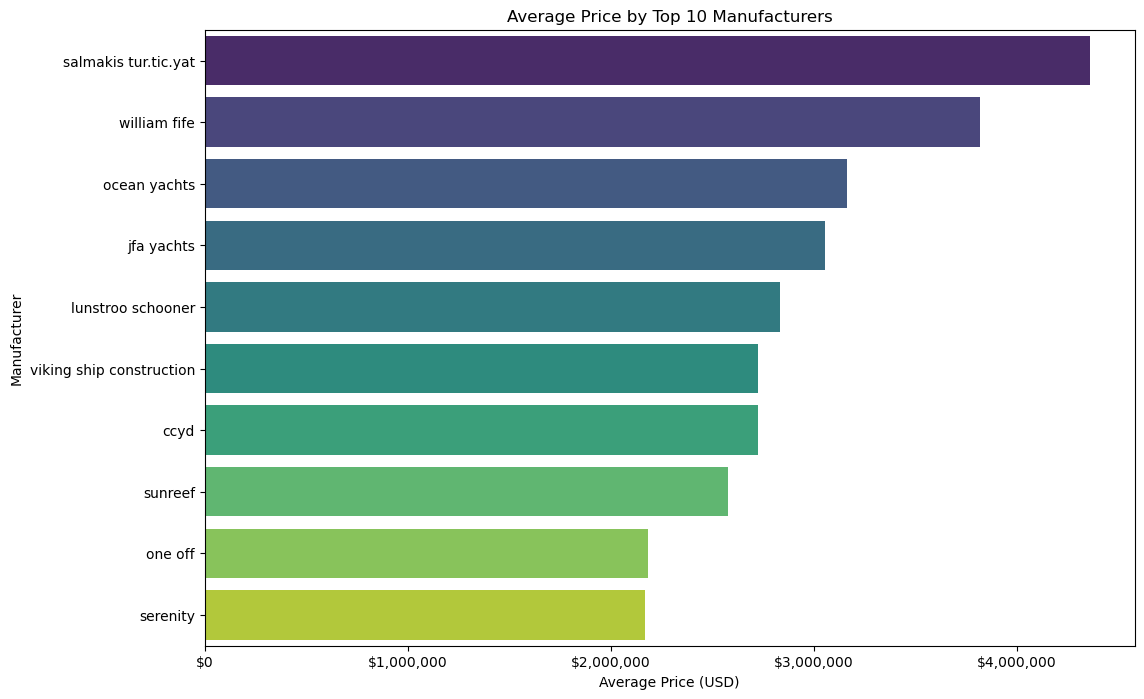

In [25]:
# Average Price by Manufacturer

plt.figure(figsize=(12, 8))
average_prices = data.groupby('manufacturer')['price_usd'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=average_prices.values, y=average_prices.index, palette='viridis')
plt.title('Average Price by Top 10 Manufacturers')
plt.xlabel('Average Price (USD)')
plt.ylabel('Manufacturer')

# Format the x-axis ticks and labels
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

plt.show()

<Figure size 1500x800 with 0 Axes>

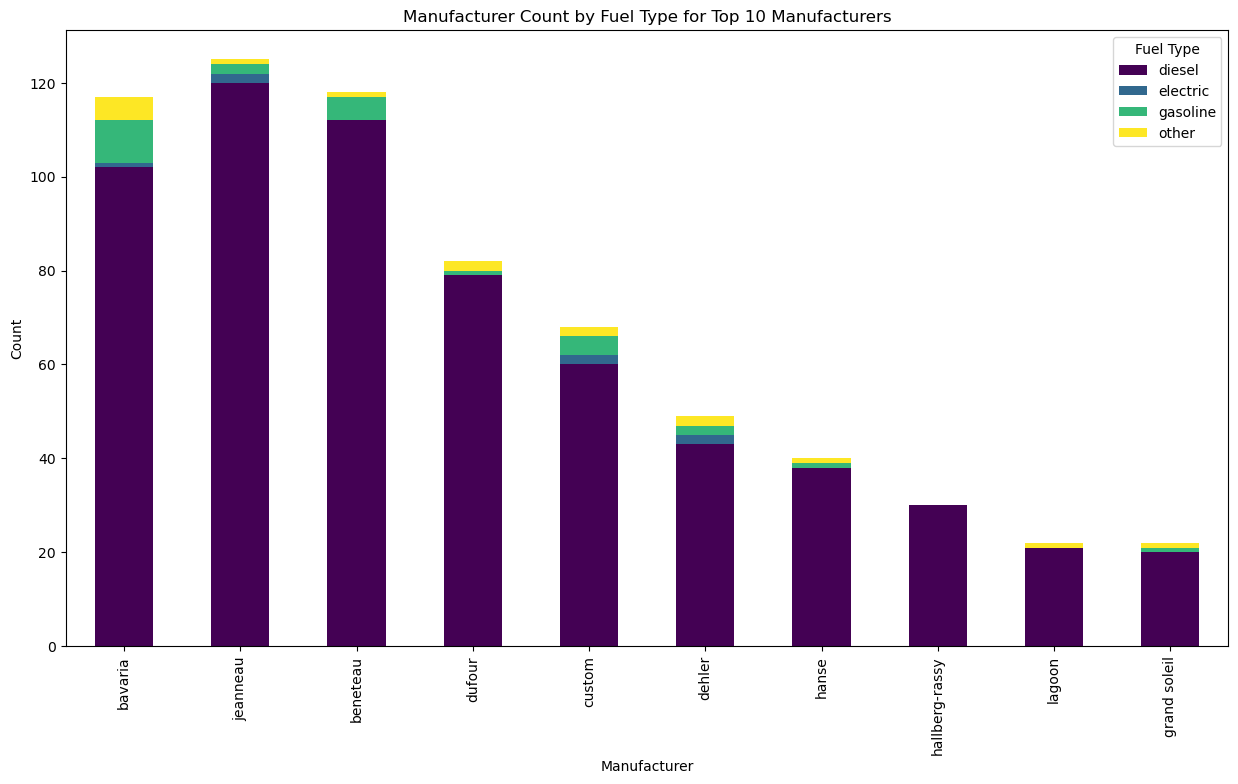

In [26]:
# Manufacturer Count by Fuel Type

plt.figure(figsize=(15, 8))
manufacturer_fuel_counts = data.groupby(['manufacturer', 'fuel']).size().unstack().fillna(0).loc[top_manufacturers.index]
manufacturer_fuel_counts.plot(kind='bar', stacked=True, cmap='viridis', figsize=(15, 8))
plt.title('Manufacturer Count by Fuel Type for Top 10 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.legend(title='Fuel Type')
plt.show()

# Fuel Type Analysis

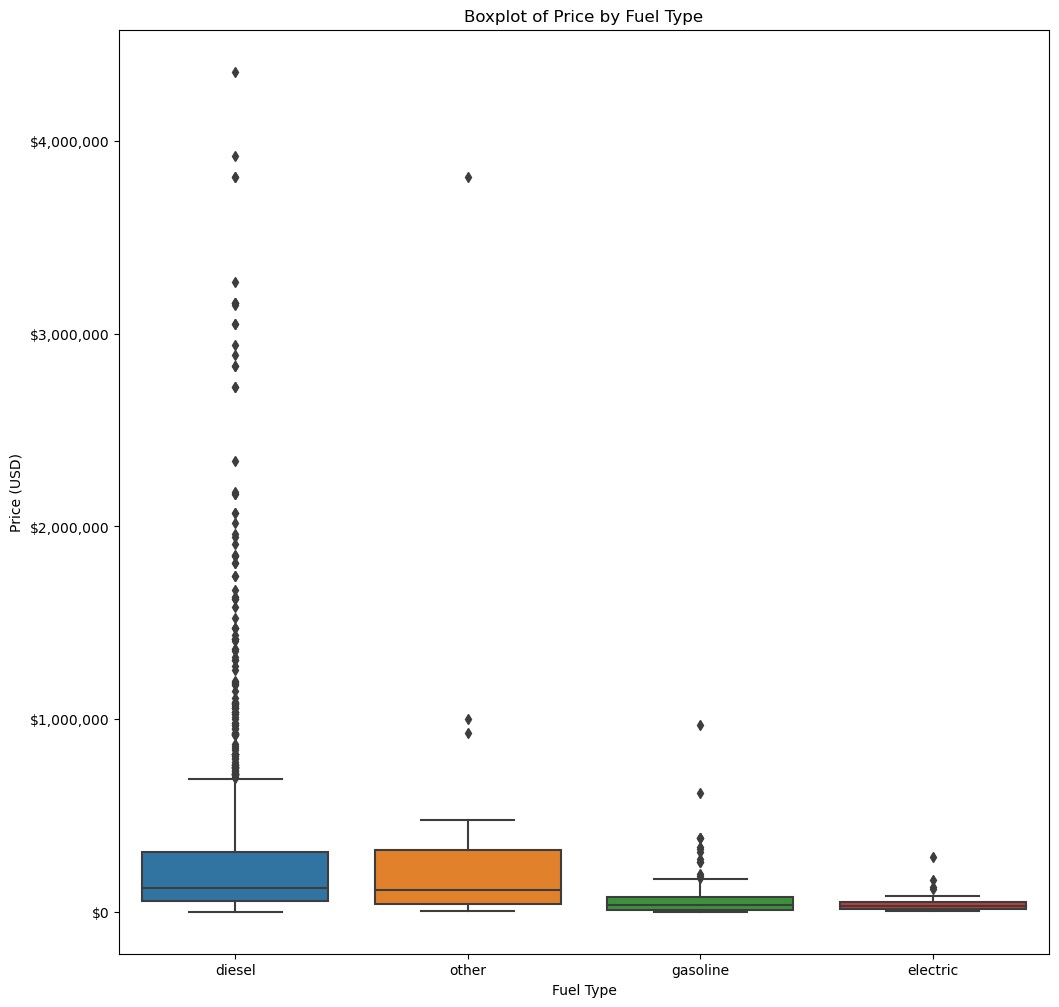

In [27]:
# Boxplot of price by fuel type

plt.figure(figsize=(12, 12))
sns.boxplot(x='fuel', y='price_usd', data=data)
plt.title('Boxplot of Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (USD)')

# Format the x-axis ticks and labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

plt.show()

In [28]:
# 2. Outlier Detection
fuel_types = data['fuel'].unique()
for fuel_type in fuel_types:
    subset_data = data[data['fuel'] == fuel_type]
    q1 = subset_data['price_usd'].quantile(0.25)
    q3 = subset_data['price_usd'].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    outliers = subset_data[subset_data['price_usd'] > upper_bound]
    if not outliers.empty:
        print(f"\nOutliers in {fuel_type} fuel type:")
        print(outliers[['length_ft', 'class', 'price_usd']])
        
        plt.show()


Outliers in diesel fuel type:
      length_ft                     class  price_usd
7           127  catamarans and trimarans    1075830
8           125         classic sailboats    3815000
9           124               sloop boats    1417000
11          122   racer/cruiser sailboats    3270000
12          120     deck saloon sailboats    3052000
...         ...                       ...        ...
651          44                  trimming     730300
790          41               sloop boats     816410
796          41                 catamaran     752100
797          41                 catamaran     752100
1245         34            sailing yachts     861100

[130 rows x 3 columns]

Outliers in other fuel type:
     length_ft                     class  price_usd
191         60                 catamaran    3815000
424         49               sloop boats     926500
435         49  catamarans and trimarans    1002800

Outliers in gasoline fuel type:
      length_ft                     cl

In [29]:
# Comparison

for fuel_type in fuel_types:
    outliers_subset = data[(data['fuel'] == fuel_type) & (data['price_usd'] > upper_bound)]
    print(f"\nComparison of outliers in {fuel_type} fuel type:")
    print(outliers_subset[['length_ft', 'class', 'price_usd']])


Comparison of outliers in diesel fuel type:
      length_ft                     class  price_usd
7           127  catamarans and trimarans    1075830
8           125         classic sailboats    3815000
9           124               sloop boats    1417000
10          123         classic sailboats     545000
11          122   racer/cruiser sailboats    3270000
...         ...                       ...        ...
1610         29                daysailers     168405
1641         28         classic sailboats     138212
1802         24                daysailers     119355
1852         21         other (sailboats)     250700
1905         13            sailing yachts     132311

[824 rows x 3 columns]

Comparison of outliers in nan fuel type:
Empty DataFrame
Columns: [length_ft, class, price_usd]
Index: []

Comparison of outliers in other fuel type:
      length_ft                     class  price_usd
117          69            sailing yachts     424010
135          66               sloop bo

# Length Analysis

In [30]:
data['length_ft'].describe()

count    1836.000000
mean       43.055556
std        69.961781
min         8.000000
25%        31.000000
50%        38.000000
75%        47.000000
max      2952.000000
Name: length_ft, dtype: float64

In [31]:
# Filter boats with length over 200 feet
length_over_200 = data[data['length_ft'] > 200]

# Display the boats with length over 200 feet
print(length_over_200.T)

                                                                  0  \
name              1976 ketch baarda zeegrundel1976 ketch baarda ...   
price_usd                                                     26705   
year                                                           1976   
manufacturer                                                  ketch   
model                                             baarda zeegrundel   
class                                               barge sail boat   
length_ft                                                      2952   
fuel                                                         diesel   
hull_material                                                 steel   
hull_shape                                                      NaN   
year_zscore                                               -0.928746   
price_usd_zscore                                           -0.35925   

                                                 1  
name              1979 

In [32]:
# Count the number of boats with length over 200 ft
boats_over_200ft = data[data['length_ft'] > 200]
num_boats_over_200ft = len(boats_over_200ft)

# Display the result
print(f"Number of boats with length over 200 feet: {num_boats_over_200ft}")

Number of boats with length over 200 feet: 2


In [33]:
# Remove rows where the length is over 200 feet
data = data[data['length_ft'] <= 200]

# Display the length data
data['length_ft'].describe()

count    1834.000000
mean       41.344602
std        15.874958
min         8.000000
25%        31.000000
50%        38.000000
75%        47.000000
max       127.000000
Name: length_ft, dtype: float64

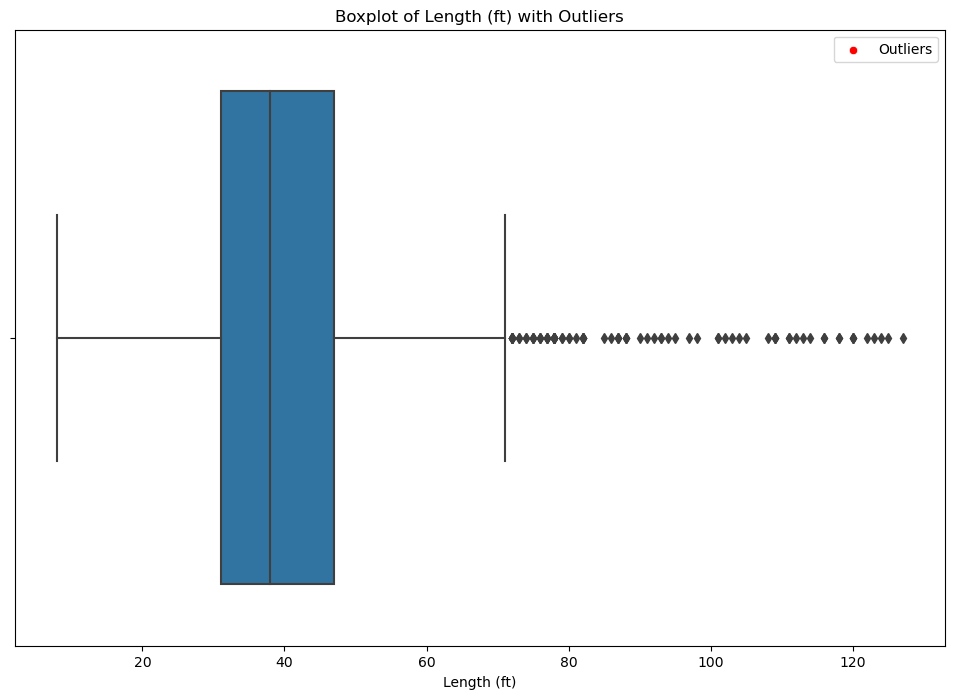

In [34]:
# Calculate the IQR for 'length_ft'
Q1 = data['length_ft'].quantile(0.25)
Q3 = data['length_ft'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['length_ft'] < lower_bound) | (data['length_ft'] > upper_bound)]

# Boxplot with outliers highlighted
plt.figure(figsize=(12, 8))
sns.boxplot(x='length_ft', data=data)
sns.scatterplot(x='length_ft', y=None, data=outliers, color='red', label='Outliers')
plt.title('Boxplot of Length (ft) with Outliers')
plt.xlabel('Length (ft)')
plt.show()

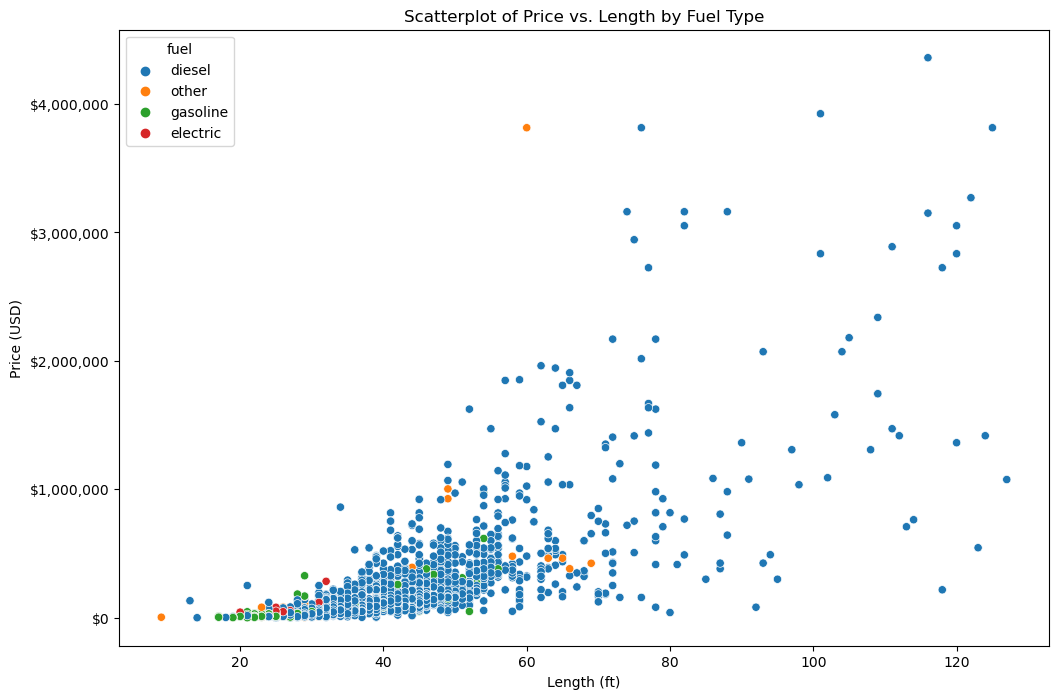

In [35]:
# Price vs. Length by Fuel Type

plt.figure(figsize=(12, 8))
sns.scatterplot(x='length_ft', y='price_usd', hue='fuel', data=data)
plt.title('Scatterplot of Price vs. Length by Fuel Type')
plt.xlabel('Length (ft)')
plt.ylabel('Price (USD)')

# Format the y-axis ticks and labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

plt.show()

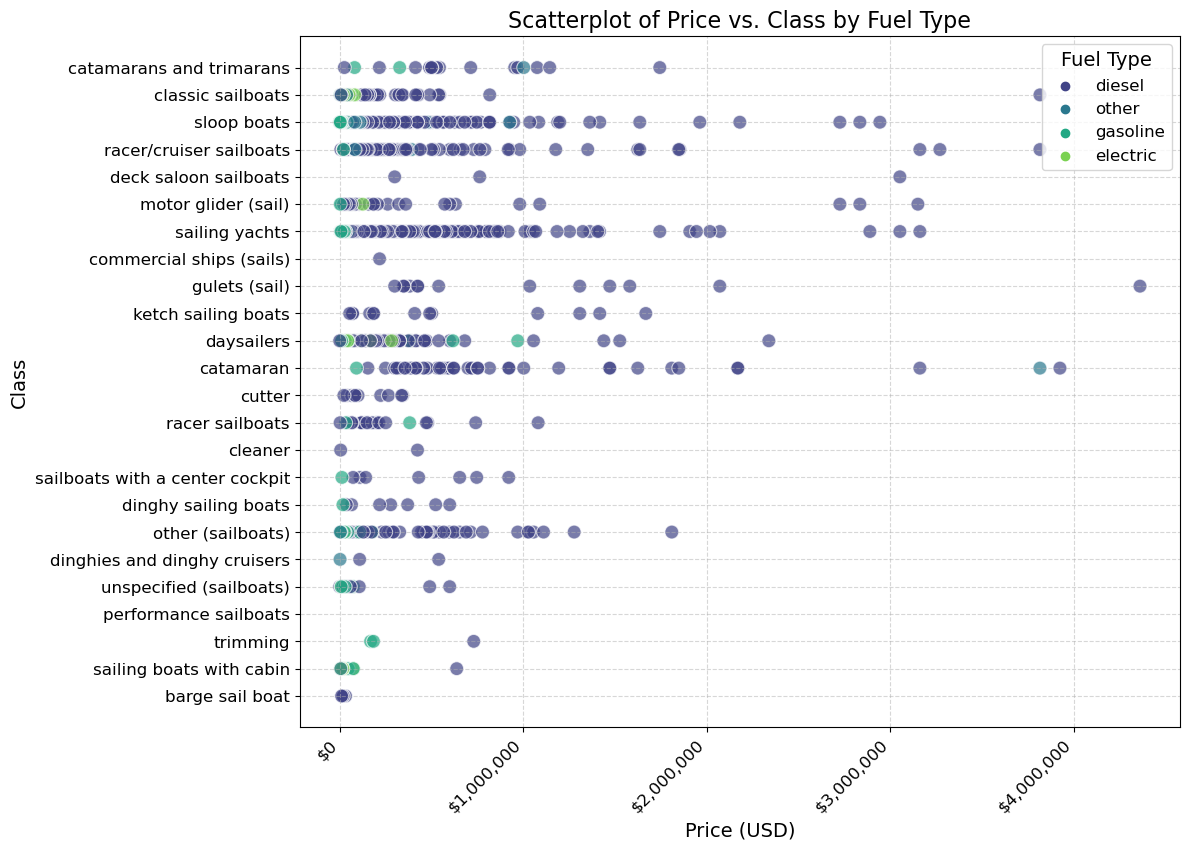

In [36]:
# Price vs. Class by Fuel Type

plt.figure(figsize=(12, 8))
sns.scatterplot(x='price_usd', y='class', hue='fuel', data=data, palette='viridis', alpha=0.7, edgecolor='w', s=100)
plt.title('Scatterplot of Price vs. Class by Fuel Type', fontsize=16)
plt.xlabel('Price (USD)', fontsize=14)
plt.ylabel('Class', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Fuel Type', title_fontsize='14', fontsize='12', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Format the x-axis ticks and labels
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

plt.show()

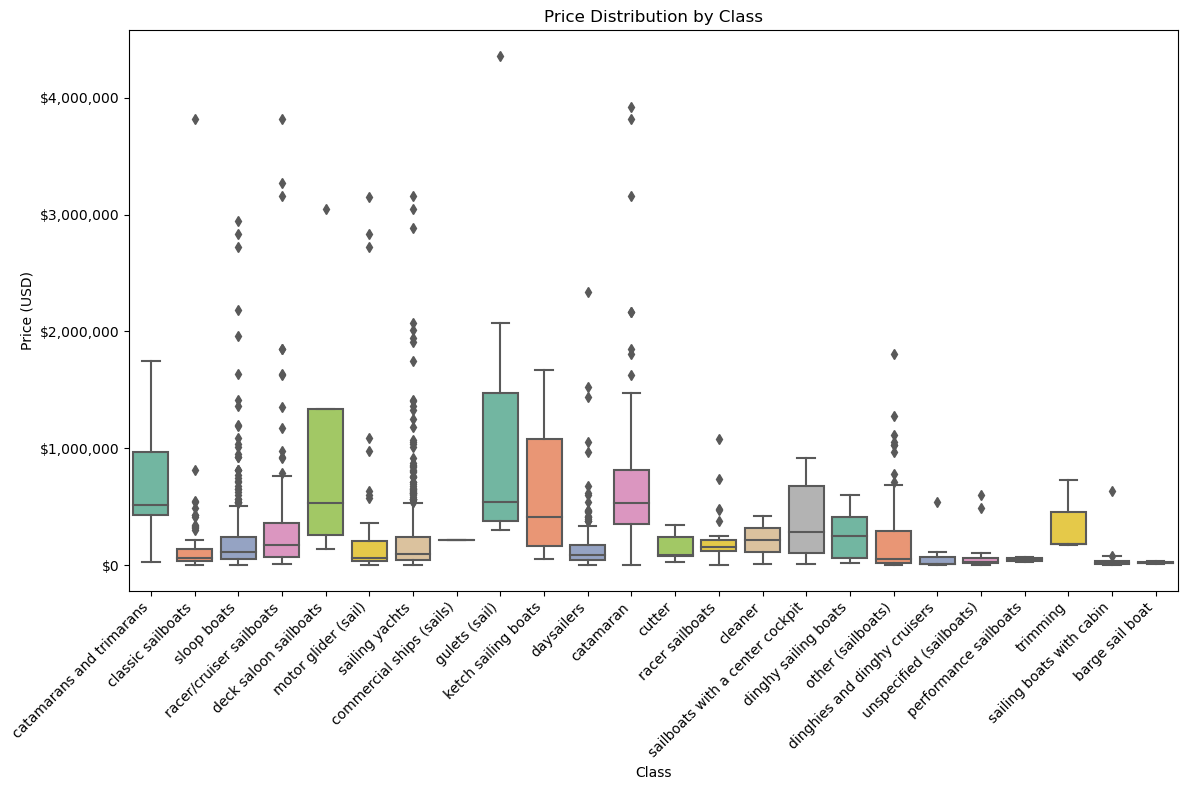

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='class', y='price_usd', data=data, palette='Set2')
plt.title('Price Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Format the y-axis ticks and labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

plt.show()

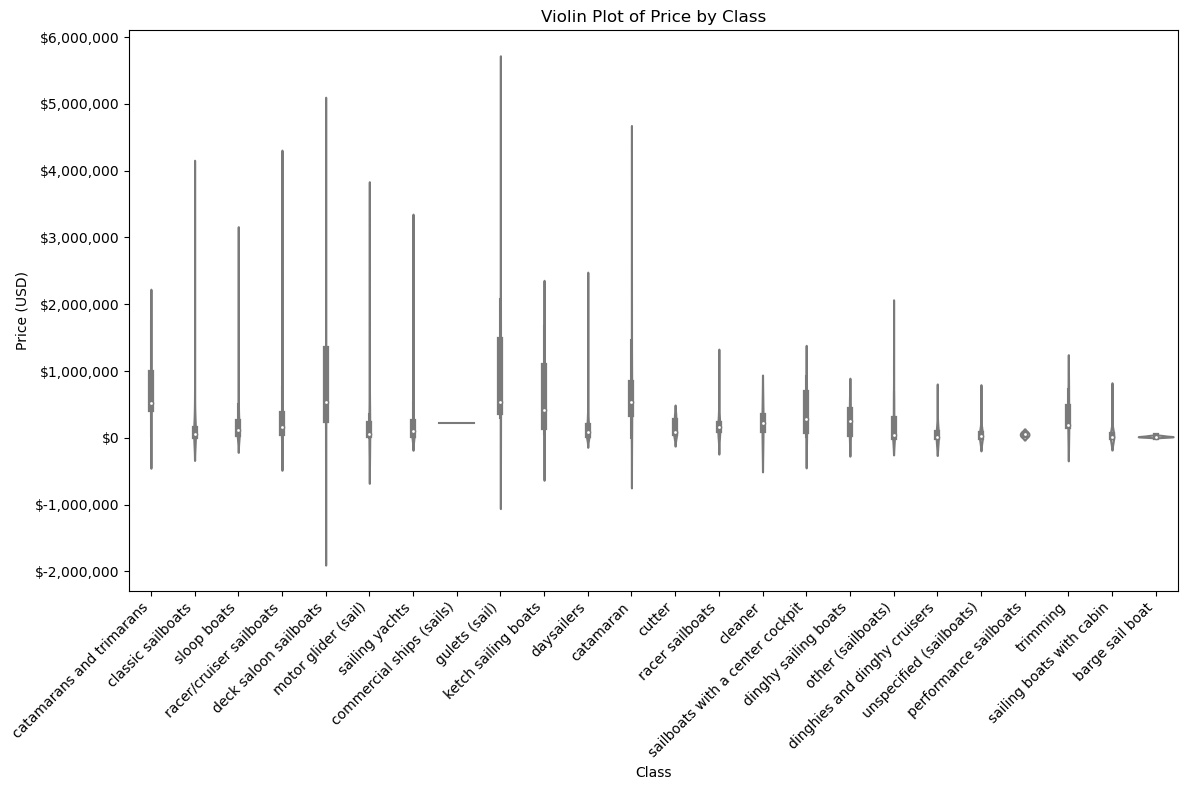

In [38]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='class', y='price_usd', data=data, palette='Pastel1')
plt.title('Violin Plot of Price by Class')
plt.xlabel('Class')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Format the y-axis ticks and labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

plt.show()

In [39]:
#Check out numeric data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price_usd,1834.0,246769.254635,432323.293403,16.000000,43157.500000,104460.000000,271410.000000,4.360000e+06
year,1834.0,1996.480371,19.153610,1900.000000,1983.000000,2000.000000,2011.000000,2.024000e+03
length_ft,1834.0,41.344602,15.874958,8.000000,31.000000,38.000000,47.000000,1.270000e+02
year_zscore,1834.0,0.008905,0.876908,-4.408247,-0.608266,0.170044,0.673656,1.268834e+00
price_usd_zscore,1834.0,-0.021036,0.664433,-0.400268,-0.333965,-0.239750,0.016834,6.300543e+00


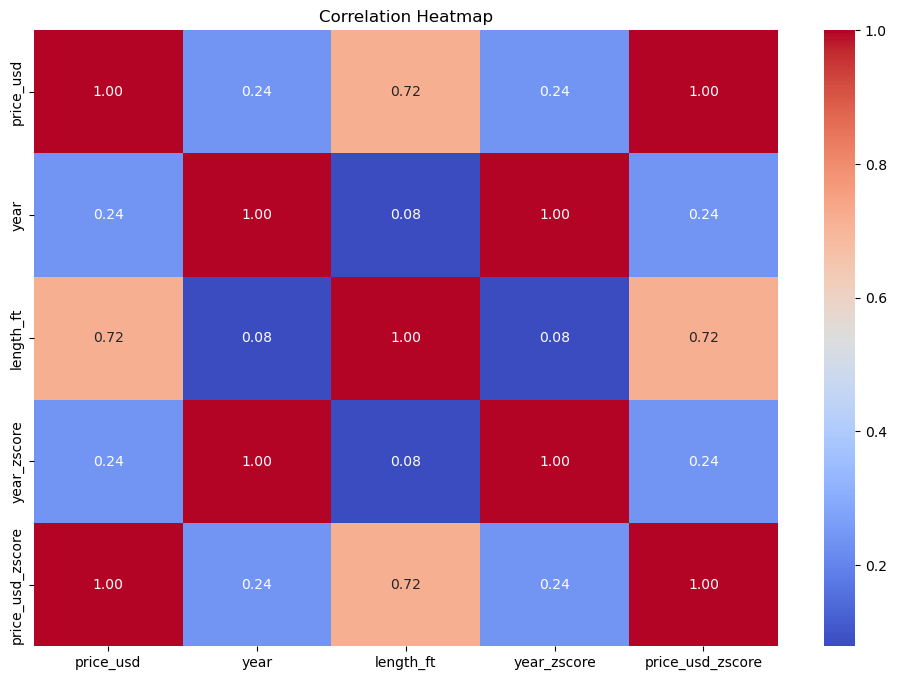

In [40]:
# Correlation heatmap for numerical features

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

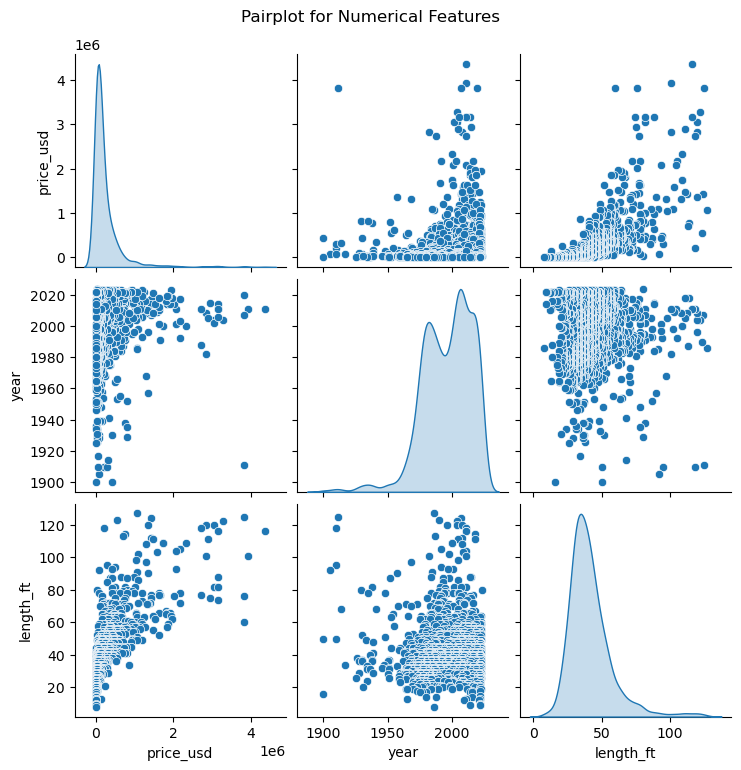

In [41]:
# Pairplot for numerical features

sns.pairplot(data[['price_usd', 'year', 'length_ft']], diag_kind='kde')
plt.suptitle('Pairplot for Numerical Features', y=1.02)
plt.show()

# Class Analysis

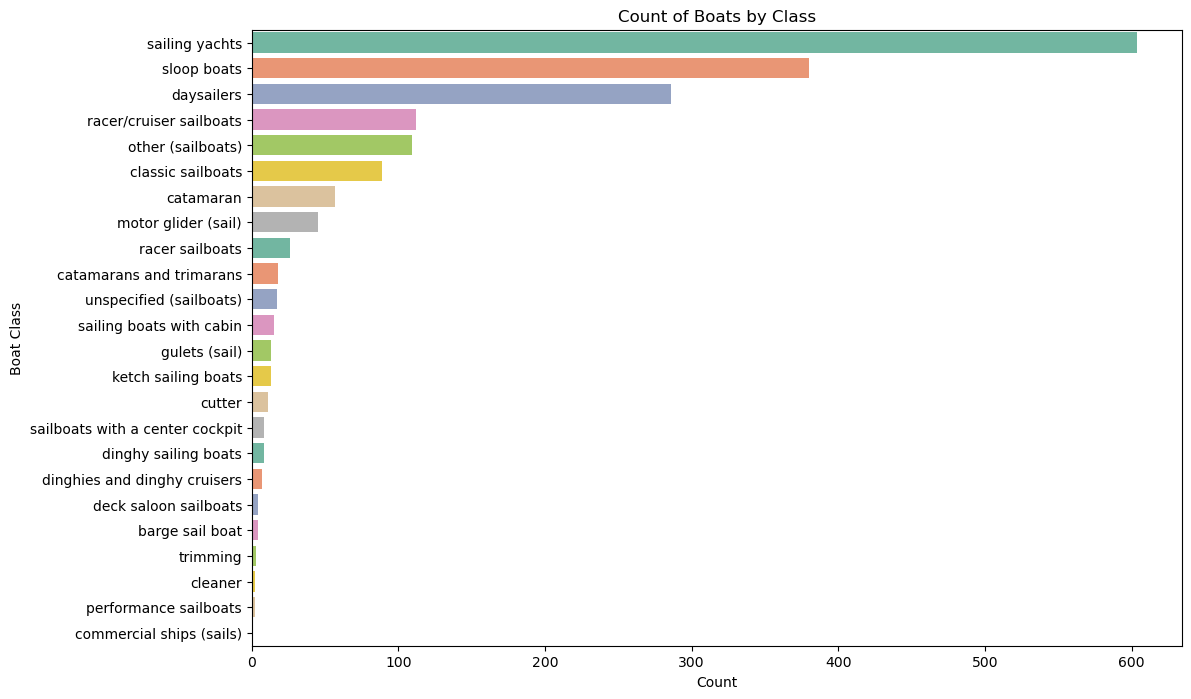

In [42]:
# Countplot for boat classes

plt.figure(figsize=(12, 8))
sns.countplot(y='class', data=data, order=data['class'].value_counts().index, palette='Set2')
plt.title('Count of Boats by Class')
plt.xlabel('Count')
plt.ylabel('Boat Class')
plt.show()

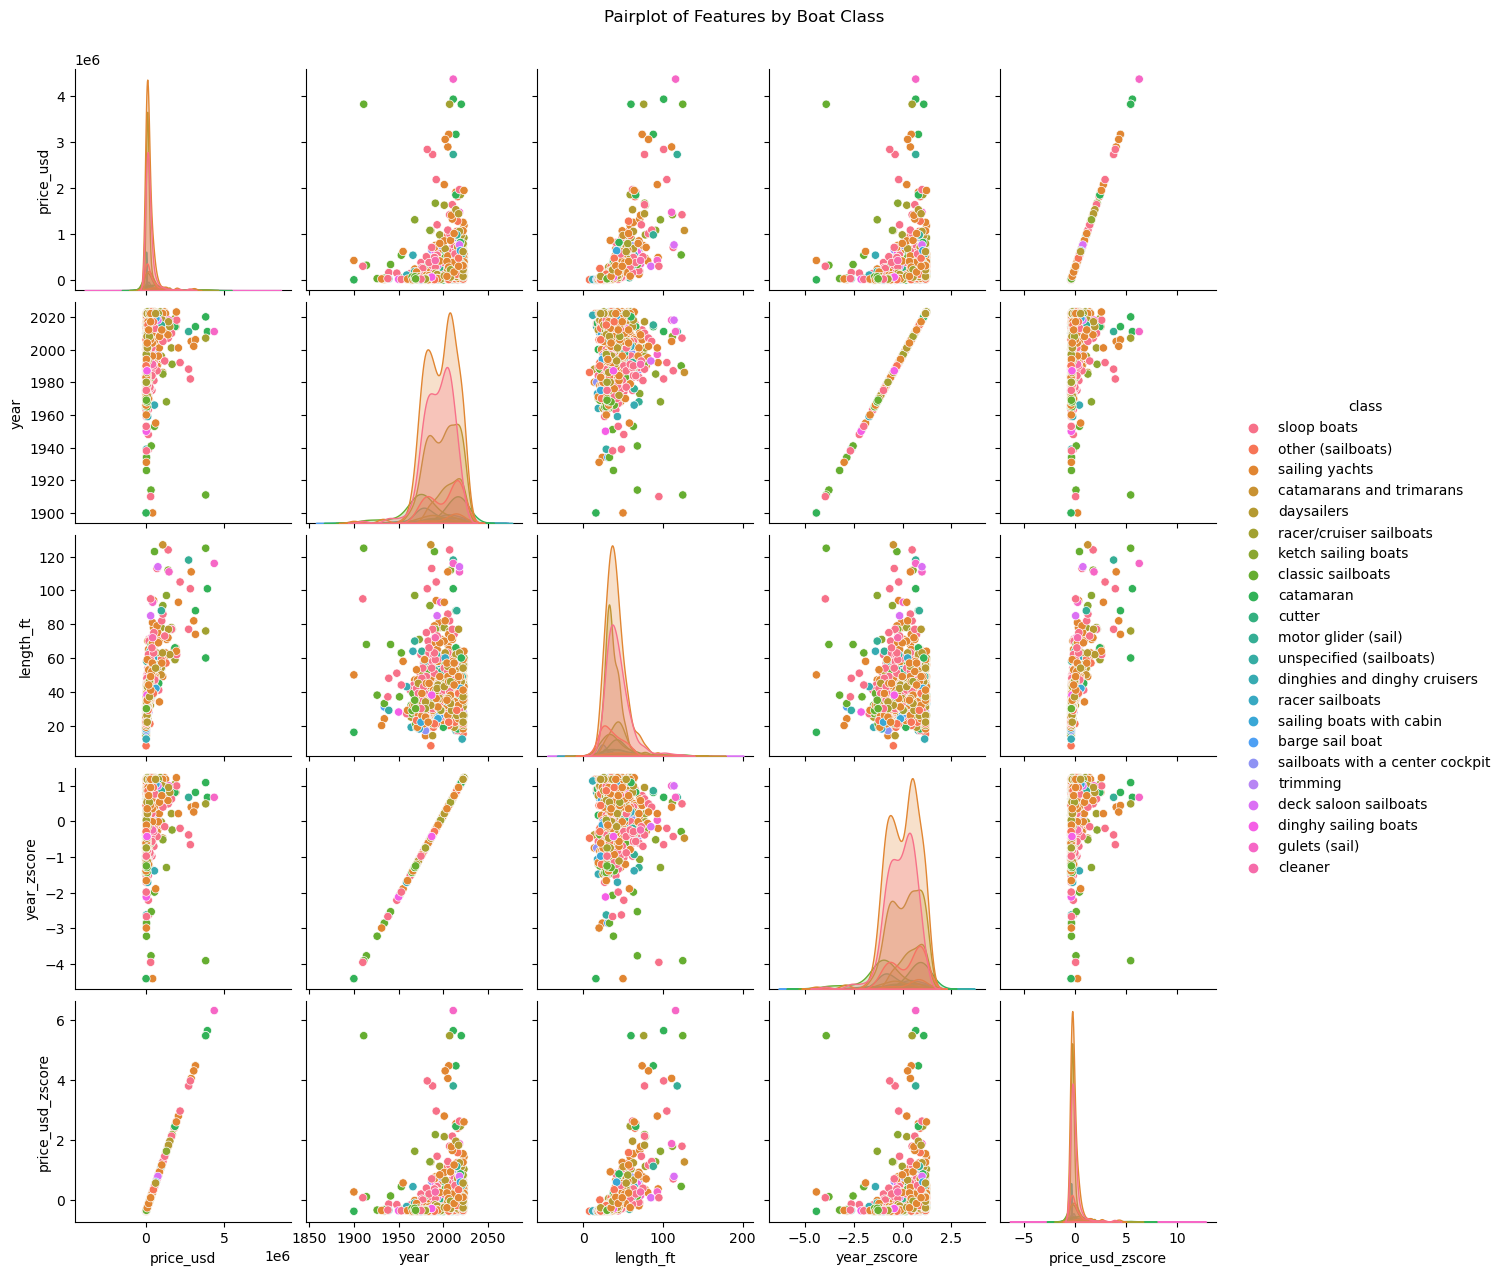

In [43]:
# Select a subset of the data for better visualization (optional)
subset_data = data.sample(1000)  # Adjust the sample size as needed

# Pairplot to explore relationships between 'class' and other numerical features
sns.pairplot(subset_data, hue='class', diag_kind='kde')
plt.suptitle('Pairplot of Features by Boat Class', y=1.02)
plt.show()

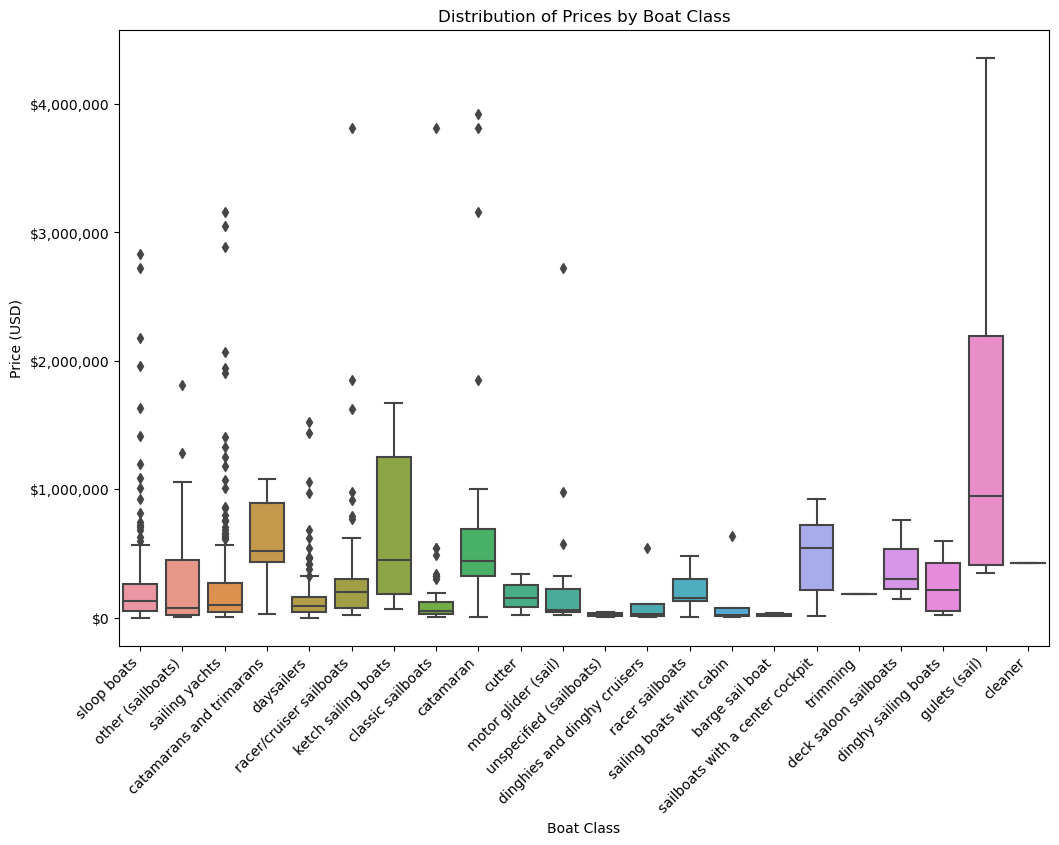

In [44]:
# Boxplot to compare the distribution of 'price_usd' for each 'class'
plt.figure(figsize=(12, 8))
sns.boxplot(x='class', y='price_usd', data=subset_data)
plt.title('Distribution of Prices by Boat Class')
plt.xlabel('Boat Class')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ha='right')

# Format the y-axis ticks and labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

plt.show()

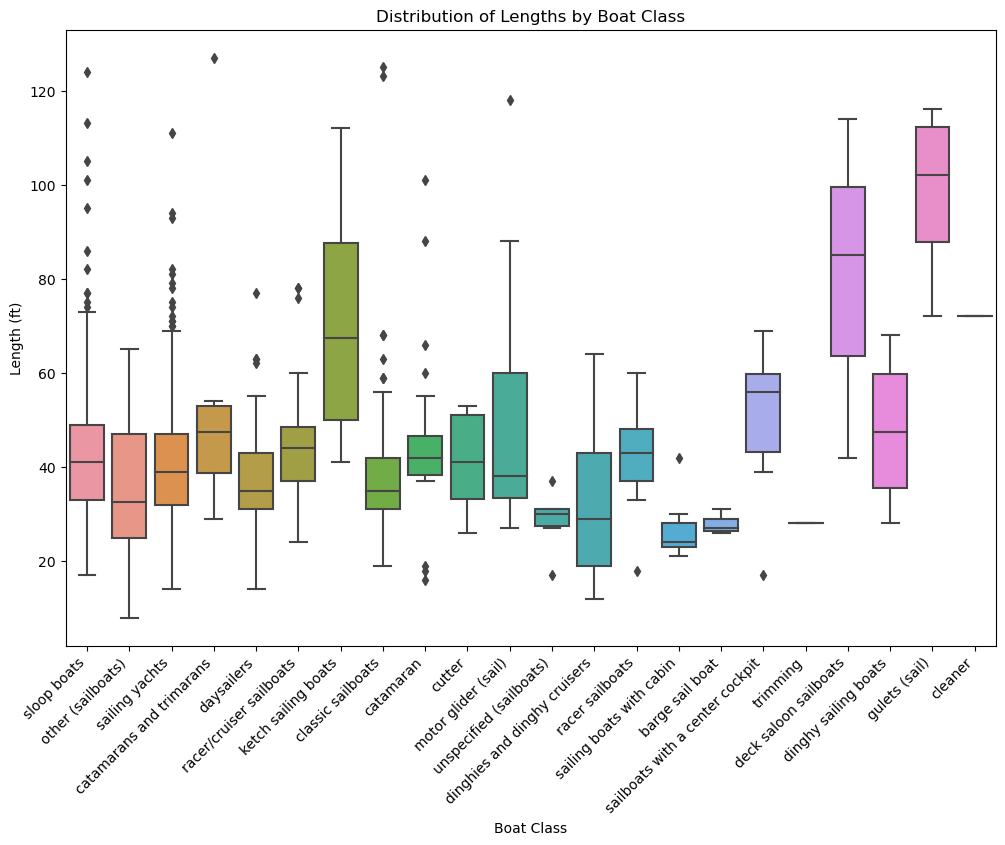

In [45]:
# Boxplot to compare the distribution of 'length_ft' for each 'class'
plt.figure(figsize=(12, 8))
sns.boxplot(x='class', y='length_ft', data=subset_data)
plt.title('Distribution of Lengths by Boat Class')
plt.xlabel('Boat Class')
plt.ylabel('Length (ft)')
plt.xticks(rotation=45, ha='right')
plt.show()

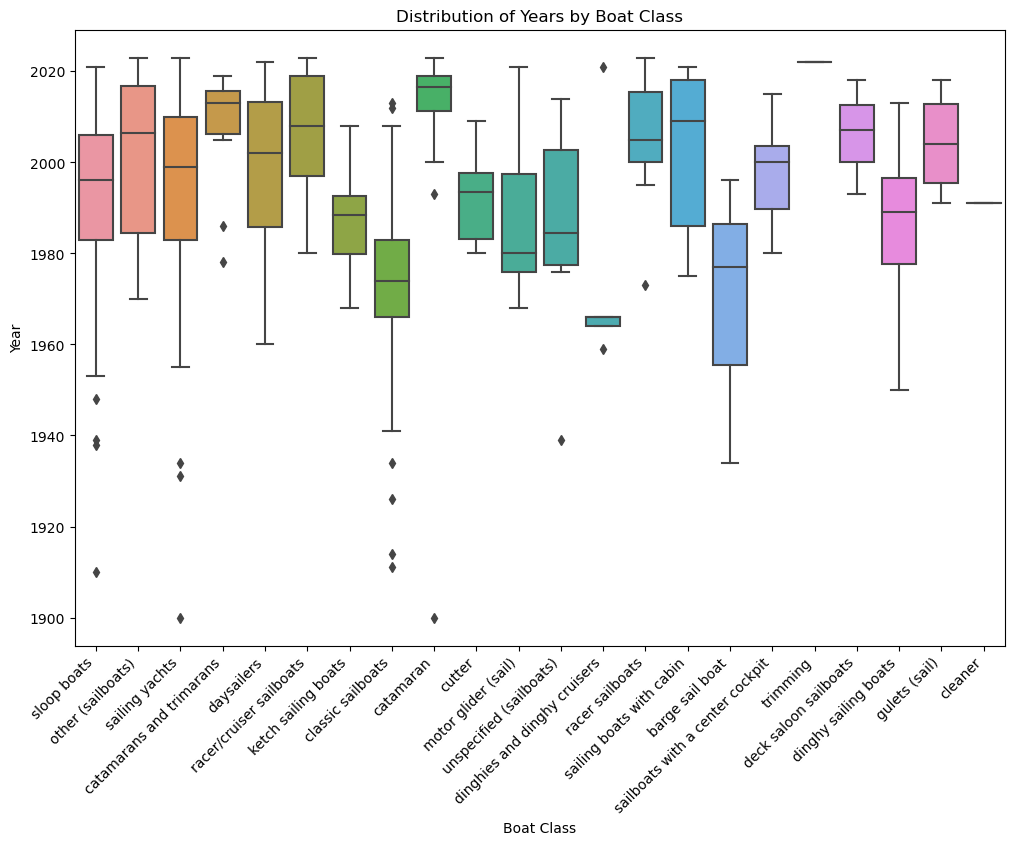

In [46]:
# Boxplot to compare the distribution of 'year' for each 'class'
plt.figure(figsize=(12, 8))
sns.boxplot(x='class', y='year', data=subset_data)
plt.title('Distribution of Years by Boat Class')
plt.xlabel('Boat Class')
plt.ylabel('Year')
plt.xticks(rotation=45, ha='right')
plt.show()

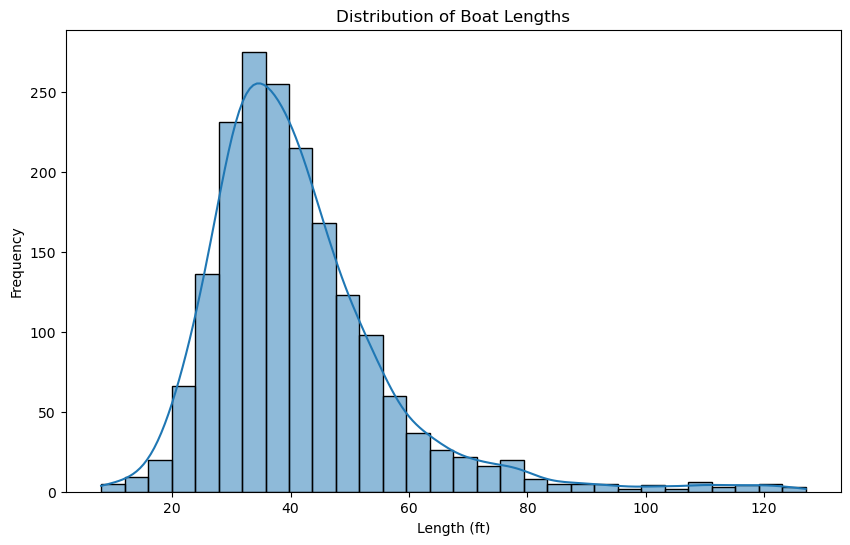

In [47]:
# Distribution of boat lengths

plt.figure(figsize=(10, 6))
sns.histplot(data['length_ft'], bins=30, kde=True)
plt.title('Distribution of Boat Lengths')
plt.xlabel('Length (ft)')
plt.ylabel('Frequency')
plt.show()

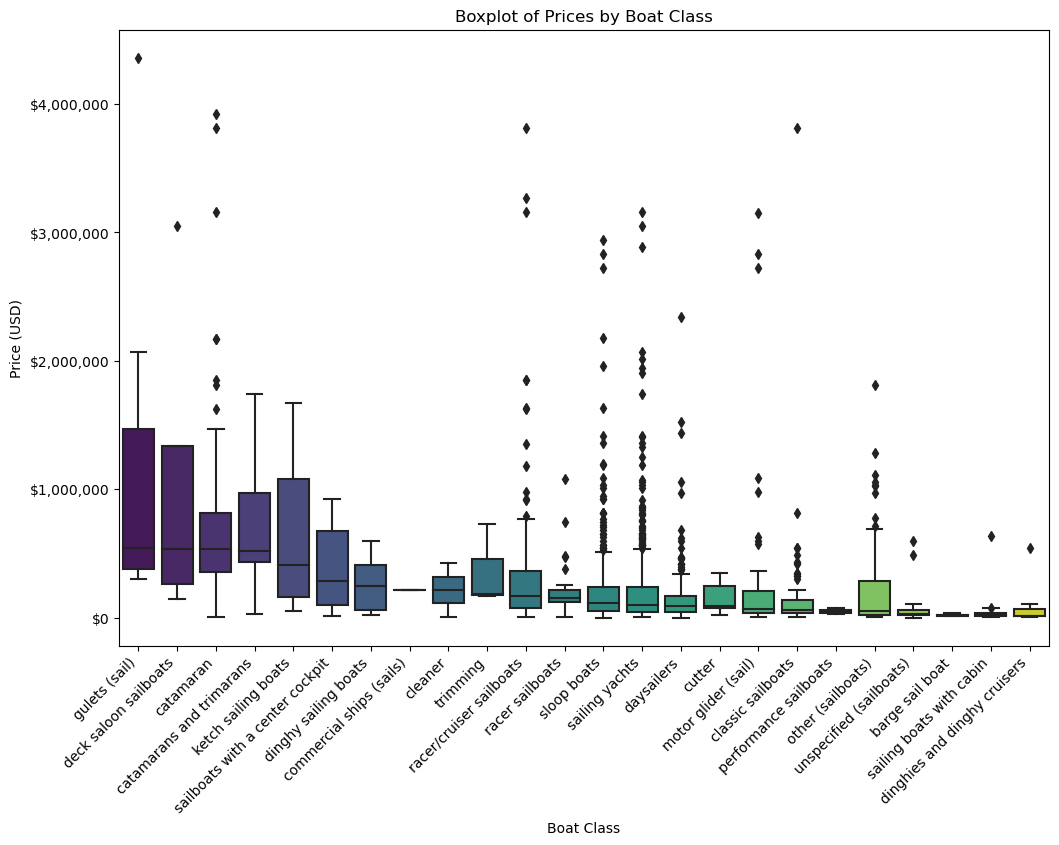

In [48]:
# Boxplot of prices by boat class

plt.figure(figsize=(12, 8))
sns.boxplot(x='class', y='price_usd', data=data, order=data.groupby('class')['price_usd'].median().sort_values(ascending=False).index, palette='viridis')
plt.title('Boxplot of Prices by Boat Class')
plt.xlabel('Boat Class')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ha='right')

# Format the y-axis ticks and labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

plt.show()

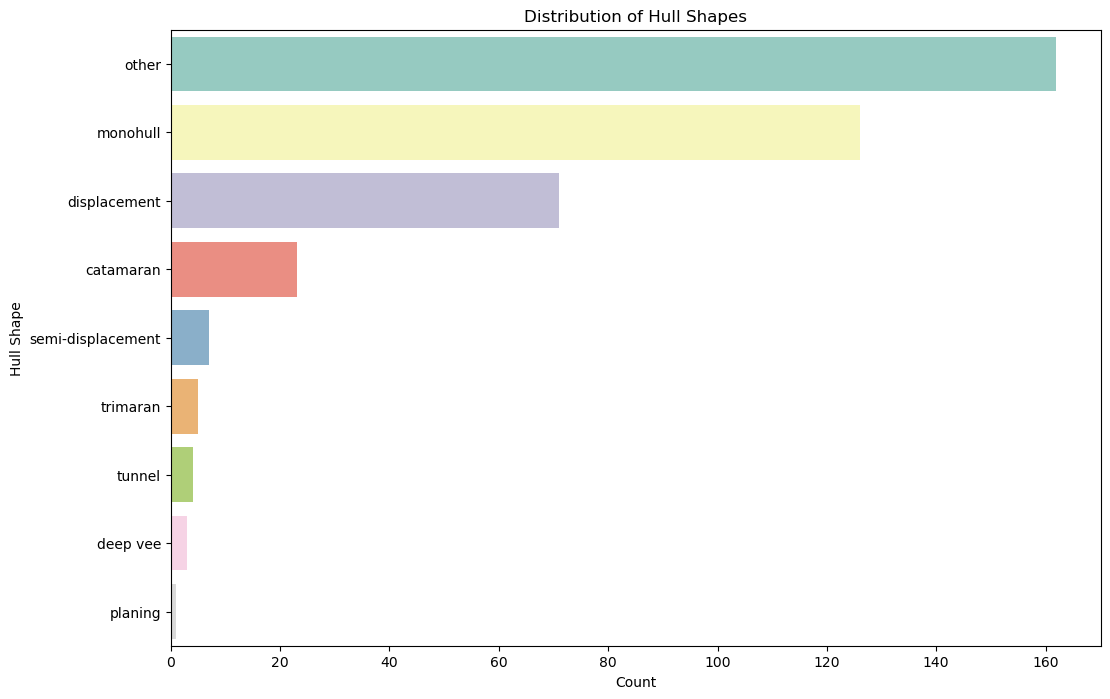

In [49]:
# Distribution of hull shapes

plt.figure(figsize=(12, 8))
sns.countplot(y='hull_shape', data=data, order=data['hull_shape'].value_counts().index, palette='Set3')
plt.title('Distribution of Hull Shapes')
plt.xlabel('Count')
plt.ylabel('Hull Shape')
plt.show()

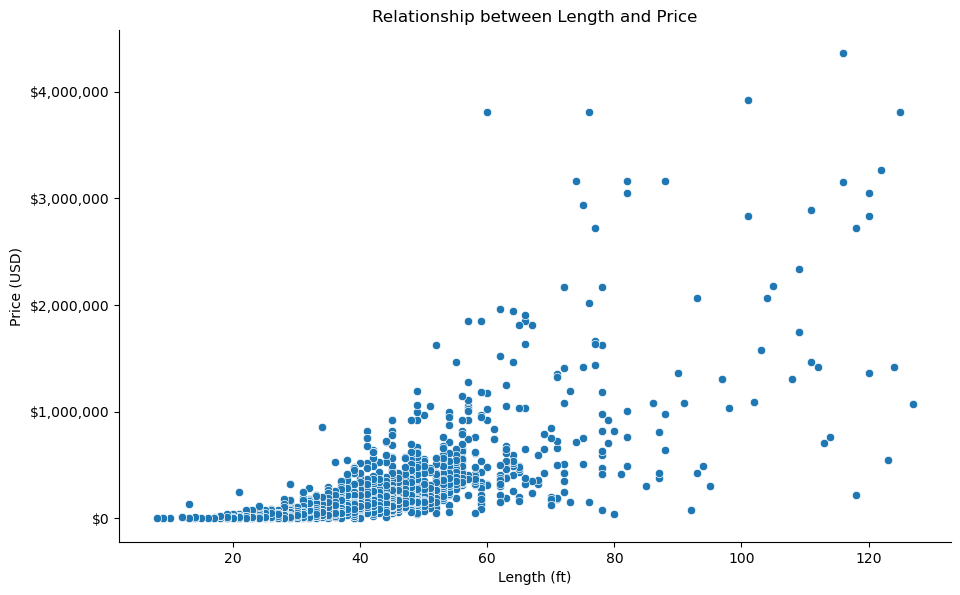

In [50]:
# Relationship plot (scatter plot) between price_usd and length_ft

sns.relplot(x='length_ft', y='price_usd', data=data, height=6, aspect=1.5)
plt.title('Relationship between Length and Price')
plt.xlabel('Length (ft)')
plt.ylabel('Price (USD)')

# Format the y-axis ticks and labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

plt.show()

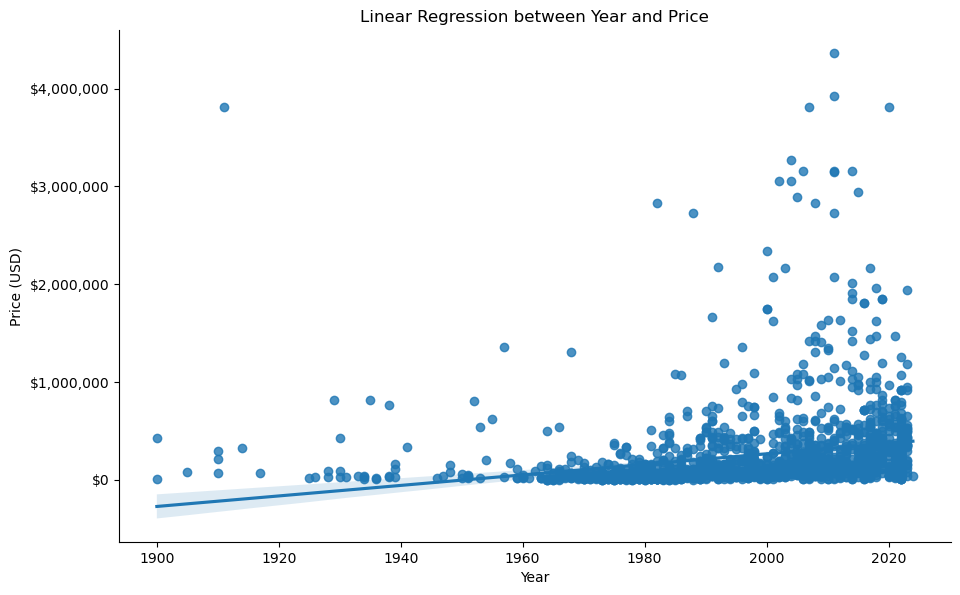

In [51]:
# Linear regression plot between year and price_usd

sns.lmplot(x='year', y='price_usd', data=data, height=6, aspect=1.5)
plt.title('Linear Regression between Year and Price')
plt.xlabel('Year')
plt.ylabel('Price (USD)')

# Format the y-axis ticks and labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

plt.show()

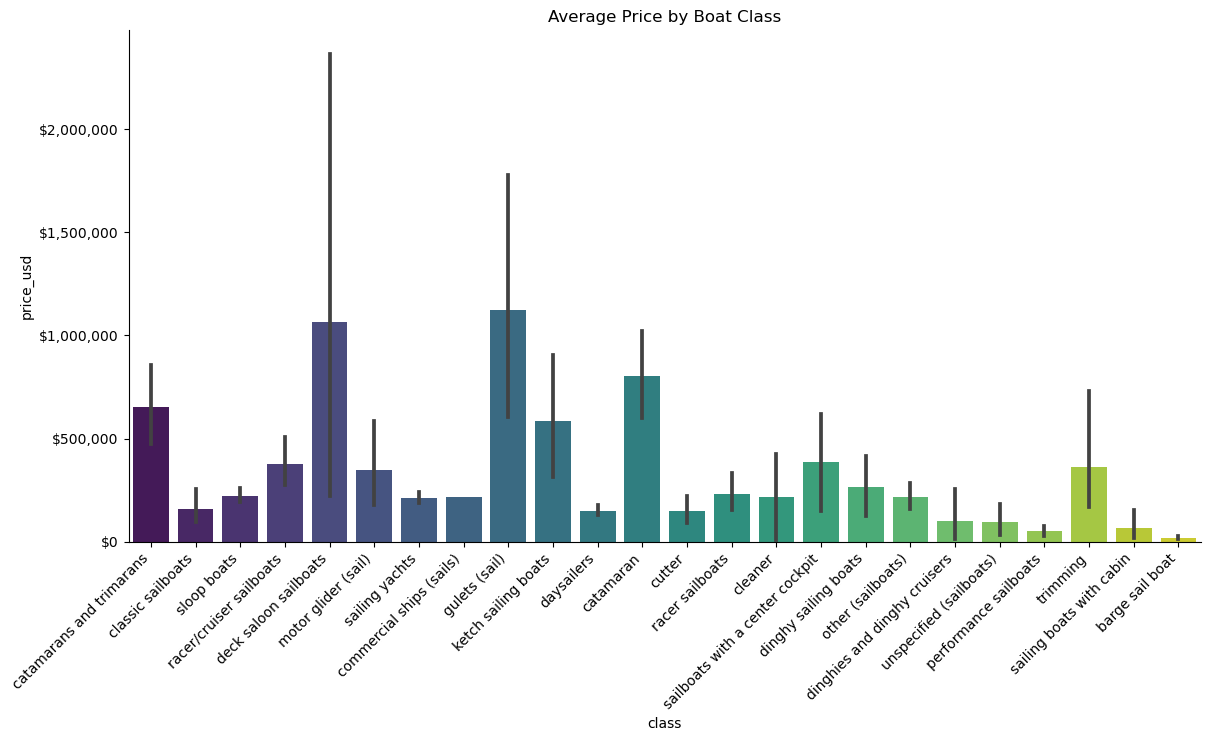

In [52]:
# Categorical plot for boat class and average price

sns.catplot(x='class', y='price_usd', data=data, kind='bar', height=6, aspect=2, palette='viridis')
plt.title('Average Price by Boat Class')
plt.xticks(rotation=45, ha='right')

# Format the y-axis ticks and labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

plt.show()

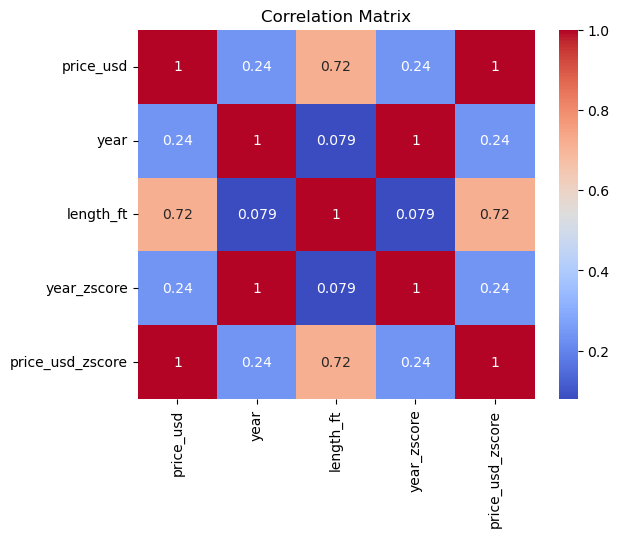

In [53]:
# Correlation Analysis

corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

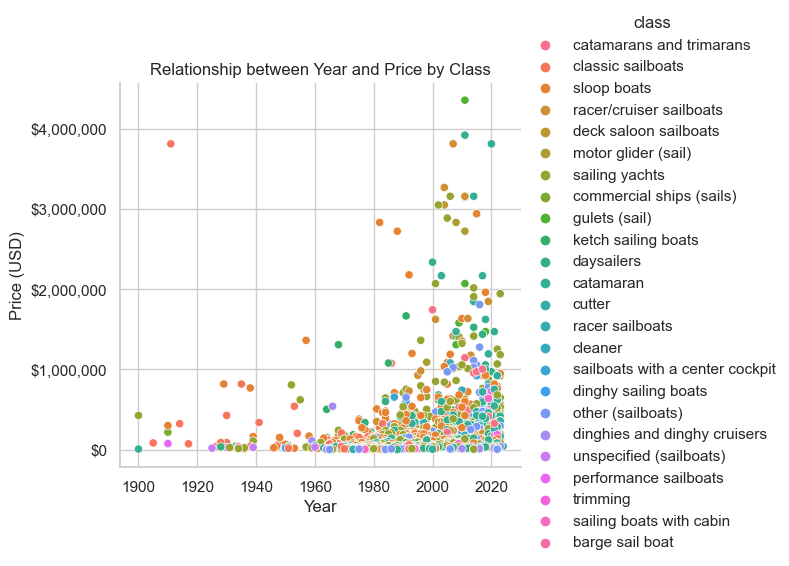

In [54]:
# Visualize Relationships with seaborn
sns.set(style="whitegrid")  # Optional: Set the plot style

# Create a scatter plot
scatter_plot = sns.relplot(x='year', y='price_usd', hue='class', data=data, kind='scatter')

# Adjust legend position
scatter_plot.fig.subplots_adjust(top=.9) 

# Add axis labels
plt.title('Relationship between Year and Price by Class')
plt.xlabel('Year')
plt.ylabel('Price (USD)')

# Format the y-axis ticks and labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))


# Show the plot
plt.show()

# Feature Engineering

In [55]:
# Convert categorical variables into dummy/indicator variables

data_encoded = pd.get_dummies(data, columns=['manufacturer', 'fuel', 'hull_material', 'hull_shape'], drop_first=True)

#Display the first few rows of the encoded dataset

data_encoded.head()

,name,price_usd,year,model,class,length_ft,year_zscore,price_usd_zscore,manufacturer_a. k. balfour,manufacturer_ab,...,hull_material_steel,hull_material_wood,hull_shape_deep vee,hull_shape_displacement,hull_shape_monohull,hull_shape_other,hull_shape_planing,hull_shape_semi-displacement,hull_shape_trimaran,hull_shape_tunnel
7,1986 fjellstrand dsc passenger catamaran1986 f...,1075830,1986,dsc passenger catamaran,catamarans and trimarans,127,-0.470917,1.253138,0,0,...,0,0,0,0,0,1,0,0,0,0
8,1911 william fife & sons 38meter1911 william f...,3815000,1911,& sons 38meter,classic sailboats,125,-3.904635,5.462939,0,0,...,0,1,0,0,0,0,0,0,0,0
9,2007 schooner eldorado2007 schooner eldorado,1417000,2007,eldorado,sloop boats,124,0.490524,1.777479,0,0,...,1,0,0,0,0,0,0,0,0,0
10,1990 custom aegean builders sa poseidon 123199...,545000,1990,aegean builders sa poseidon 123,classic sailboats,123,-0.287785,0.437311,0,0,...,1,0,0,0,0,0,0,0,0,0
11,2004 custom build gulet2004 custom build gulet,3270000,2004,gulet,racer/cruiser sailboats,122,0.353176,4.625334,0,0,...,0,1,0,0,0,0,0,0,0,0


In [56]:
# Split the data into features (X) and target variable (y)

# One-hot encode categorical variables
X = pd.get_dummies(data_encoded.drop('price_usd', axis=1))
y = data_encoded['price_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [57]:
# Train a Ridge Regression model

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [58]:
# Predictions on the test set

y_pred_ridge = ridge_model.predict(X_test_scaled)

In [59]:
# Evaluate the Ridge Regression model

ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f'Ridge Regression RMSE: {ridge_rmse}')

Ridge Regression RMSE: 161068.63172483773


In [60]:
# Feature importance from Ridge Regression

ridge_coefficients = pd.Series(ridge_model.coef_, index=X.columns)
ridge_coefficients_sorted = ridge_coefficients.abs().sort_values(ascending=False)

In [61]:
# Display the top 10 important features from Ridge Regression

top_features_ridge = ridge_coefficients_sorted.head(10)
print('Top 10 Features from Ridge Regression:')
print(top_features_ridge)



Top 10 Features from Ridge Regression:
price_usd_zscore                                                       212305.540514
length_ft                                                               35905.242095
name_2004 custom build gulet2004 custom build gulet                     32200.618579
name_2020 sunreef 602020 sunreef 60                                     29175.108137
name_2011 salmakis tur.tic.yat ketch2011 salmakis tur.tic.yat ketch     23238.523741
manufacturer_salmakis tur.tic.yat                                       23238.523741
name_2011 custom cunéo marine 312011 custom cunéo marine 31             21532.194020
model_cunéo marine 31                                                   21532.194020
manufacturer_custom build                                               21122.054727
manufacturer_sunreef                                                    19434.801864
dtype: float64


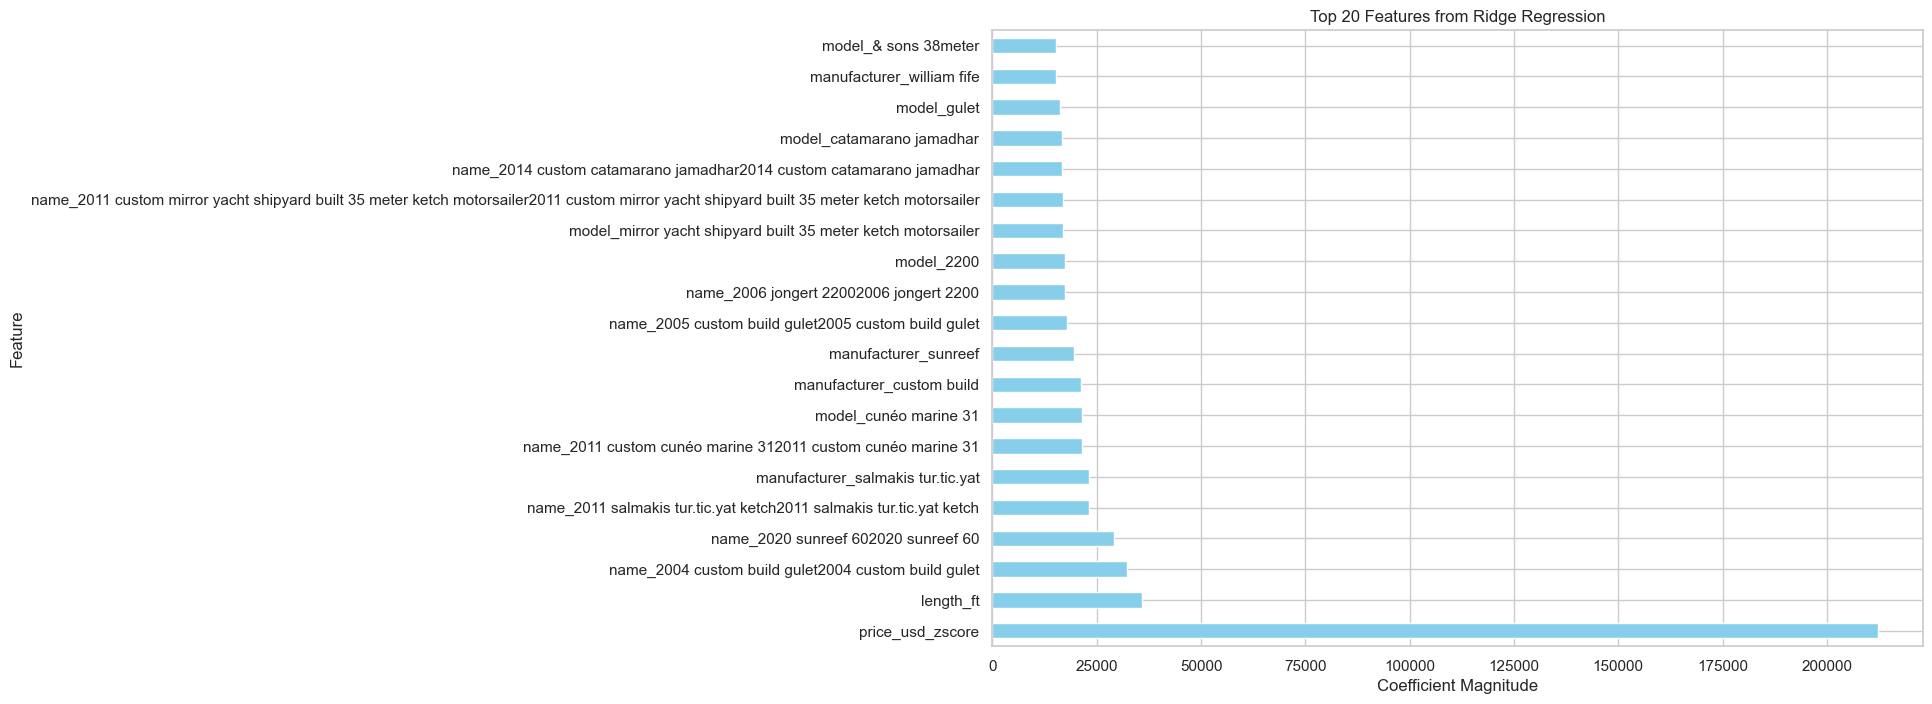

In [62]:
# Visualize the coefficients from Ridge Regression

plt.figure(figsize=(12, 8))
ridge_coefficients_sorted.head(20).plot(kind='barh', color='skyblue')
plt.title('Top 20 Features from Ridge Regression')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()